# Análise Estatística dos Acidentes de Trânsito

## Projeto da disciplina **SSC0957 - Práticas em Ciência de Dados II**

- Alexandre Eduardo de Souza Jesus - alexandre_souza@usp.br - 12559506

- Lucas Ivars Cadima Ciziks - luciziks@usp.br - 125599472

- Gustavo Silva de Oliveira - guspfc03@usp.br - 12567231

<img src="pictures.gif" style="width: 200px;"/>

---


## 6. Análise Estatística dos Dados

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import plotly.express as px

In [28]:
prf_rain_data = pd.read_csv("prf_rain_data.csv", index_col=0)
prf_rain_data.columns
prf_rain_data_tests = prf_rain_data[['rain','temperature_2m','apparent_temperature','relativehumidity_2m','cloudcover','windspeed_10m']]

In [29]:
prf_not_rain_data = pd.read_csv("prf_not_rain_data.csv", index_col=0)
prf_not_rain_data_tests = prf_not_rain_data[['rain','temperature_2m','apparent_temperature','relativehumidity_2m','cloudcover','windspeed_10m']]

### 6.1 Testes Estatísticos

In [30]:
# testando normalidade das variáveis com o teste shapiro-wilk
# H0 (hipotese nula) - os dados seguem uma distribuição normal

alpha = 0.05

for column in prf_rain_data_tests.columns:
    statistic, p_value = stats.shapiro(prf_rain_data_tests[column])
    if p_value > alpha:
        print(f"{column}: os dados são normais")
    else:
        print(f"{column}: os dados não são normais")

rain: os dados não são normais
temperature_2m: os dados são normais
apparent_temperature: os dados não são normais
relativehumidity_2m: os dados não são normais
cloudcover: os dados não são normais
windspeed_10m: os dados não são normais


In [31]:
alpha = 0.05

for column in prf_not_rain_data_tests.columns:
    statistic, p_value = stats.shapiro(prf_not_rain_data_tests[column])
    if p_value > alpha:
        print(f"{column}: os dados são normais")
    else:
        print(f"{column}: os dados não são normais")

rain: os dados não são normais
temperature_2m: os dados não são normais
apparent_temperature: os dados não são normais
relativehumidity_2m: os dados não são normais
cloudcover: os dados não são normais
windspeed_10m: os dados não são normais


In [32]:
# como a normalidade foi rejeitada, utiliza-se o teste não-paramétrico de Mann-Whitney para verificar
# a diferença entre os grupos

alpha = 0.05

statistic, p_value = stats.mannwhitneyu(prf_rain_data_tests['rain'], prf_not_rain_data_tests['rain'])

if p_value > alpha:
    print(f"não há diferença significativa entre as variáveis ({p_value})")
else:
    print(f"há diferença significativa entre as variáveis ({p_value})")

há diferença significativa entre as variáveis (1.2329597100927212e-132)


In [33]:
statistic, p_value = stats.mannwhitneyu(prf_rain_data_tests['temperature_2m'], prf_not_rain_data_tests['temperature_2m'])

if p_value > alpha:
    print(f"não há diferença significativa entre as variáveis ({p_value})")
else:
    print(f"há diferença significativa entre as variáveis ({p_value})")

há diferença significativa entre as variáveis (7.172223211328207e-07)


In [34]:
statistic, p_value = stats.mannwhitneyu(prf_rain_data_tests['apparent_temperature'], prf_not_rain_data_tests['apparent_temperature'])

if p_value > alpha:
    print(f"não há diferença significativa entre as variáveis ({p_value})")
else:
    print(f"há diferença significativa entre as variáveis ({p_value})")

não há diferença significativa entre as variáveis (0.14641530295557445)


In [35]:
statistic, p_value = stats.mannwhitneyu(prf_rain_data_tests['relativehumidity_2m'], prf_not_rain_data_tests['relativehumidity_2m'])

if p_value > alpha:
    print(f"não há diferença significativa entre as variáveis ({p_value})")
else:
    print(f"há diferença significativa entre as variáveis ({p_value})")

há diferença significativa entre as variáveis (1.2481311341241215e-56)


In [36]:
statistic, p_value = stats.mannwhitneyu(prf_rain_data_tests['cloudcover'], prf_not_rain_data_tests['cloudcover'])

if p_value > alpha:
    print(f"não há diferença significativa entre as variáveis ({p_value})")
else:
    print(f"há diferença significativa entre as variáveis ({p_value})")

há diferença significativa entre as variáveis (3.963067035891679e-129)


In [37]:
statistic, p_value = stats.mannwhitneyu(prf_rain_data_tests['windspeed_10m'], prf_not_rain_data_tests['windspeed_10m'])

if p_value > alpha:
    print(f"não há diferença significativa entre as variáveis ({p_value})")
else:
    print(f"há diferença significativa entre as variáveis ({p_value})")

há diferença significativa entre as variáveis (0.000606321895064651)


In [38]:
prf_rain_data_tests.describe()

,rain,temperature_2m,apparent_temperature,relativehumidity_2m,cloudcover,windspeed_10m
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,0.904934,21.723612,23.884846,84.630837,81.125110,8.910573
std,1.523465,4.237671,5.584589,12.947197,24.388504,5.102003
min,0.000000,9.100000,5.800000,35.000000,2.000000,0.000000
25%,0.100000,18.950000,20.400000,78.000000,66.000000,5.200000
50%,0.300000,21.900000,24.400000,88.000000,95.000000,7.900000
75%,1.100000,24.500000,27.700000,94.000000,100.000000,11.550000
max,18.300000,34.800000,39.000000,100.000000,100.000000,45.500000


In [39]:
prf_not_rain_data_tests.describe()

,rain,temperature_2m,apparent_temperature,relativehumidity_2m,cloudcover,windspeed_10m
count,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,0.192952,22.547137,24.015242,73.256388,45.554185,9.527489
std,0.687469,5.120949,6.489959,18.243512,34.270380,4.987270
min,0.000000,2.400000,-1.300000,17.000000,0.000000,0.400000
25%,0.000000,19.300000,19.800000,61.000000,15.000000,5.800000
50%,0.000000,22.900000,24.700000,76.000000,40.000000,8.600000
75%,0.100000,26.000000,28.800000,88.000000,75.000000,12.600000
max,9.000000,35.600000,39.900000,100.000000,100.000000,35.600000


### 6.2 PCA

In [40]:
prf_rain_data_pca = prf_rain_data[['rain','temperature_2m','apparent_temperature','relativehumidity_2m','cloudcover','windspeed_10m']]
prf_rain_data_pca.head()

,rain,temperature_2m,apparent_temperature,relativehumidity_2m,cloudcover,windspeed_10m
6,0.2,21.2,24.3,88.0,100.0,1.4
29,0.4,21.5,21.9,80.0,80.0,17.0
72,0.1,22.7,26.2,91.0,29.0,6.9
175,4.1,27.9,30.5,63.0,100.0,9.4
183,1.1,23.2,26.9,89.0,100.0,6.2


<Axes: >

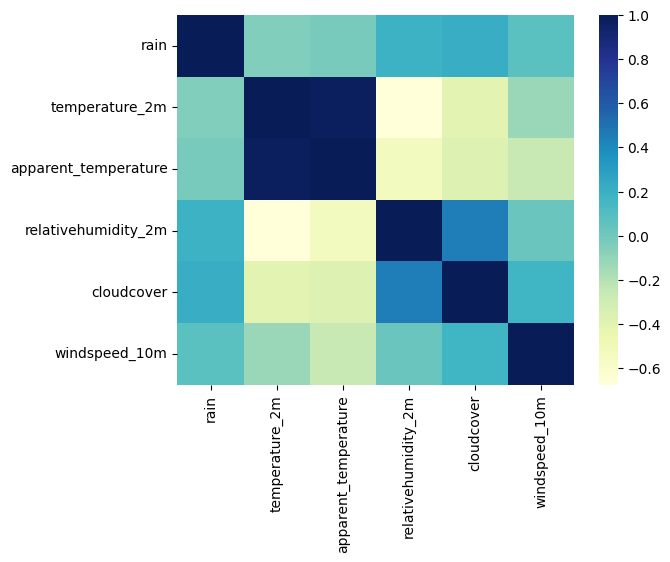

In [41]:
corr = prf_rain_data_pca.corr()

sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_data = scaler.fit_transform(prf_rain_data_pca)

standardized_df = pd.DataFrame(standardized_data, columns=prf_rain_data_pca.columns)

standardized_df.head()

,rain,temperature_2m,apparent_temperature,relativehumidity_2m,cloudcover,windspeed_10m
0,-0.462921,-0.123616,0.074372,0.260338,0.774267,-1.472732
1,-0.331584,-0.052791,-0.355572,-0.357829,-0.046153,1.586238
2,-0.528590,0.230508,0.414744,0.492151,-2.138224,-0.394249
3,2.098161,1.458138,1.185059,-1.671433,0.774267,0.095971
4,0.128098,0.348550,0.540144,0.337609,0.774267,-0.531510


In [43]:
X = np.matrix(standardized_df)
S = np.cov(np.transpose(X))

In [44]:
X = np.asarray(X)

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

In [46]:
pca.fit(X)

PCA(n_components=6)

In [47]:
pca.explained_variance_ratio_

np.round(pca.explained_variance_ratio_,2)

array([0.47, 0.18, 0.17, 0.11, 0.07, 0.  ])

In [48]:
pca.explained_variance_ratio_.cumsum()

array([0.4713384 , 0.65360032, 0.81940568, 0.92956875, 0.99973879,
       1.        ])

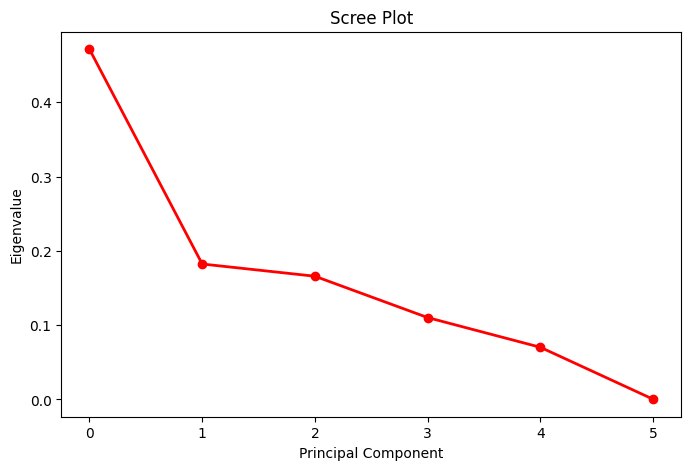

In [49]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

plt.show()

In [50]:
pca.transform(X)

array([[-1.53990167e-01, -4.98670112e-01, -1.38629055e+00,
        -8.82688134e-01,  3.12418551e-01, -1.95735590e-02],
       [-2.47509013e-01, -1.16384697e-02,  1.67900531e+00,
         3.27506832e-02, -6.12125247e-02, -1.46683395e-02],
       [ 1.05151521e+00, -1.07280152e+00, -3.30039505e-01,
         1.31994697e+00, -1.16894092e+00,  2.15583352e-03],
       ...,
       [ 2.75809307e+00, -3.22836458e-01,  4.04303243e-01,
         5.37712378e-01, -5.78384291e-01,  8.91678727e-03],
       [ 5.11972283e-01,  2.61708437e-01,  1.04370407e+00,
        -5.64577126e-01, -7.99476916e-01, -1.36454116e-03],
       [-1.35015275e+00,  1.55537145e+00,  5.54709059e-01,
         2.48547389e-01, -7.78379848e-02, -1.55522761e-02]])

In [51]:
PCA1 = pca.transform(X)[:,0]
PCA2 = pca.transform(X)[:,1]
PCA3 = pca.transform(X)[:,2]

In [52]:
prf_rain_data['PCA1'] = PCA1
prf_rain_data['PCA2'] = PCA2
prf_rain_data['PCA3'] = PCA3

In [56]:
prf_rain_data.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'rounded_datetime', 'rain', 'temperature_2m',
       'apparent_temperature', 'relativehumidity_2m', 'cloudcover',
       'windspeed_10m', 'is_day', 'PCA1', 'PCA2', 'PCA3'],
      dtype='object')

In [57]:
fig = px.scatter_3d(prf_rain_data, x='PCA1', y='PCA2', z='PCA3',
              color='fase_dia')
fig.show()

In [58]:
fig = px.scatter_3d(prf_rain_data, x='PCA1', y='PCA2', z='PCA3',
              color='classificacao_acidente')
fig.show()

In [59]:
fig = px.scatter_3d(prf_rain_data, x='PCA1', y='PCA2', z='PCA3',
              color='condicao_metereologica')
fig.show()

In [60]:
fig = px.scatter_3d(prf_rain_data, x='PCA1', y='PCA2', z='PCA3',
              color='tipo_pista')
fig.show()

In [ ]:
fig = px.scatter_3d(prf_rain_data, x='PCA1', y='PCA2', z='PCA3',
              color='tipo_pista')
fig.show()

In [64]:
fig = px.scatter_3d(prf_rain_data, x='PCA1', y='PCA2', z='PCA3',
              color='dia_semana')
fig.show()

### 6.3 Análise Fatorial